# ETAPA 1 - Leitura dos dados e importação das bibliotecas

In [1]:
#importação de bibliotecas
import pandas as pd
from scipy import stats as st
import numpy as np
import math as mt
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_games = pd.read_csv('games.csv')

# ETAPA 2 - Preparação dos dados

In [3]:
#transformando as colunas em minúsculas
df_games.columns = df_games.columns.str.lower()

In [4]:
df_games.columns.str.strip()

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

In [5]:
# Análise inicial dos dados
df_games.info()
print()
df_games.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB



,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [6]:
'''Conversão de colunas em texto para o tipo string e padronização em letras minúsculas para evitar erros.'''


df_games['name'] = df_games['name'].astype('string').str.lower()
df_games['platform'] = df_games['platform'].astype('string').str.lower()
df_games['genre'] = df_games['genre'].astype('string').str.lower()

In [7]:
'''Ao tentar converter o dado de ano para o tipo inteiro, um erro ocorreu, devido aos valores nulos desta coluna.
Sendo assim, foi realizada uma análise para entender se os valores eram expressivos em relação ao total da base, 
ou se seguiam algum padrão específico. Nenhum dos dois casos foi identificado, com isso, optou-se por atribuir o
valor de 0 a todas as linhas nulas no dataframe e depois convertê-las.'''

#Filtrando as linhas do dataframe e que o ano é nulo

#df_games[df_games['year_of_release'].isna()]




'Ao tentar converter o dado de ano para o tipo inteiro, um erro ocorreu, devido aos valores nulos desta coluna.\nSendo assim, foi realizada uma análise para entender se os valores eram expressivos em relação ao total da base, \nou se seguiam algum padrão específico. Nenhum dos dois casos foi identificado, com isso, optou-se por atribuir o\nvalor de 0 a todas as linhas nulas no dataframe e depois convertê-las.'

In [8]:
df_games['year_of_release'] = pd.to_numeric(df_games['year_of_release'], errors='coerce').astype('Int64')

In [9]:
df_games[df_games['year_of_release'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,madden nfl 2004,ps2,<NA>,sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,fifa soccer 2004,ps2,<NA>,sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,lego batman: the videogame,wii,<NA>,action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe smackdown vs. raw 2006,ps2,<NA>,fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,space invaders,2600,<NA>,shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,pdc world championship darts 2008,psp,<NA>,sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,freaky flyers,gc,<NA>,racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,inversion,pc,<NA>,shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,hakuouki: shinsengumi kitan,ps3,<NA>,adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [10]:
#Conversão da coluna user_score para float
#Assim será possível realizar operações numéricas com estes dados

df_games['user_score'] = pd.to_numeric(df_games['user_score'], errors='coerce')

In [11]:
#Inclusão de uma coluna com a soma das vendas em todas as regiões
df_games['total_sales'] = (df_games['na_sales'] + df_games['na_sales'] + df_games['na_sales'] + df_games['other_sales'])

In [12]:
df_games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,wii sports,wii,2006,sports,41.36,28.96,3.77,8.45,76.0,8.0,E,132.53
1,super mario bros.,nes,1985,platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,88.01
2,mario kart wii,wii,2008,racing,15.68,12.76,3.79,3.29,82.0,8.3,E,50.33
3,wii sports resort,wii,2009,sports,15.61,10.93,3.28,2.95,80.0,8.0,E,49.78
4,pokemon red/pokemon blue,gb,1996,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,34.81


# ETAPA 3 - Análise de Dados

In [13]:
#Total de jogos lançados por ano
lanc_by_year= df_games['year_of_release'].value_counts()
lanc_by_year = lanc_by_year.sort_index()


<Axes: xlabel='year_of_release'>

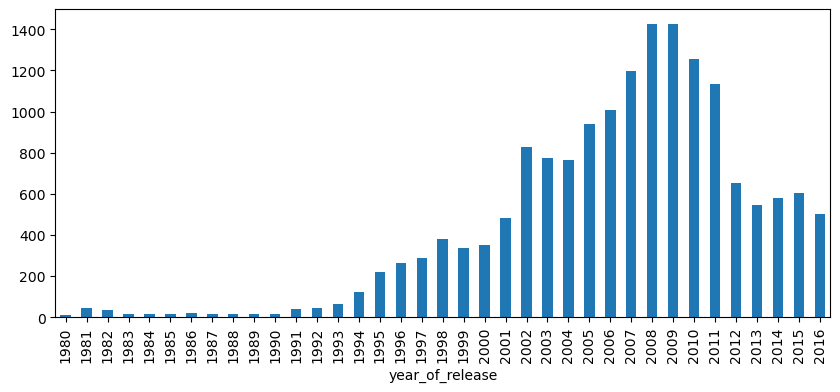

In [14]:
lanc_by_year.plot(kind='bar', figsize=(10,4))

**Observações spbre a quantidade de jogos lançados por ano**

É possível observar uma grande crescente no número de jogos lançados com o passar as décadas. Os números dos anos 1980, eram na ordem das dezenas , praticamente ínfimos em comparação anos 2010, que estão da ontem das centenas e até milhares.

In [15]:
#Análise do volume de vendas por cada plataforma

vendas_por_plataforma = df_games.groupby('platform')[['platform','total_sales']].sum()
vendas_por_plataforma = vendas_por_plataforma.sort_values(by='total_sales', ascending=False)                                                                      

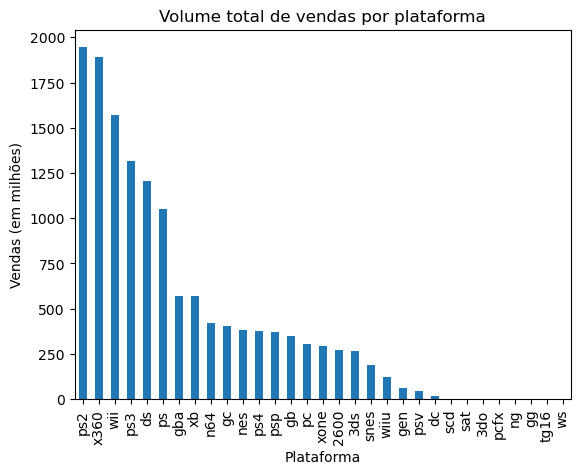

In [16]:
vendas_por_plataforma['total_sales'].plot(kind='bar', 
                                          title='Volume total de vendas por plataforma', 
                                          xlabel='Plataforma', 
                                          ylabel='Vendas (em milhões)')
plt.show()

**Principais plataformas de jogos**

O critério que fomentou a seleção das principais plataformas para a empresa foi o valor de receita por elas acumulado. Avaliando a distribuição dos valores, ficaram entendidas como principais as que possuem um valores total de vendas sueriores a 1000. Seis plataformas atendiam a este critério e foram obserserdadas em análises mais próximas, conforme demonstrado a seguir. 

In [17]:
top_6 = vendas_por_plataforma.head(6)
print(top_6)

                                                   platform  total_sales
platform                                                                
ps2       ps2ps2ps2ps2ps2ps2ps2ps2ps2ps2ps2ps2ps2ps2ps2p...      1944.96
x360      x360x360x360x360x360x360x360x360x360x360x360x3...      1893.17
wii       wiiwiiwiiwiiwiiwiiwiiwiiwiiwiiwiiwiiwiiwiiwiiw...      1569.77
ps3       ps3ps3ps3ps3ps3ps3ps3ps3ps3ps3ps3ps3ps3ps3ps3p...      1316.15
ds        dsdsdsdsdsdsdsdsdsdsdsdsdsdsdsdsdsdsdsdsdsdsds...      1206.46
ps        pspspspspspspspspspspspspspspspspspspspspspsps...      1050.47


In [18]:
top_6_names = ['ps2', 'x360', 'wii', 'ps3', 'ds', 'ps']
df_princ_plat = df_games[df_games['platform'].isin(top_6_names)]

In [19]:
df_princ_plat

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,wii sports,wii,2006,sports,41.36,28.96,3.77,8.45,76.0,8.0,E,132.53
2,mario kart wii,wii,2008,racing,15.68,12.76,3.79,3.29,82.0,8.3,E,50.33
3,wii sports resort,wii,2009,sports,15.61,10.93,3.28,2.95,80.0,8.0,E,49.78
6,new super mario bros.,ds,2006,platform,11.28,9.14,6.50,2.88,89.0,8.5,E,36.72
7,wii play,wii,2006,misc,13.96,9.18,2.93,2.84,58.0,6.6,E,44.72
...,...,...,...,...,...,...,...,...,...,...,...,...
16700,mezase!! tsuri master ds,ds,2009,sports,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.00
16704,plushees,ds,2008,simulation,0.01,0.00,0.00,0.00,NaN,NaN,E,0.03
16709,score international baja 1000: the official game,ps2,2008,racing,0.00,0.00,0.00,0.00,NaN,NaN,NaN,0.00
16710,samurai warriors: sanada maru,ps3,2016,action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.00


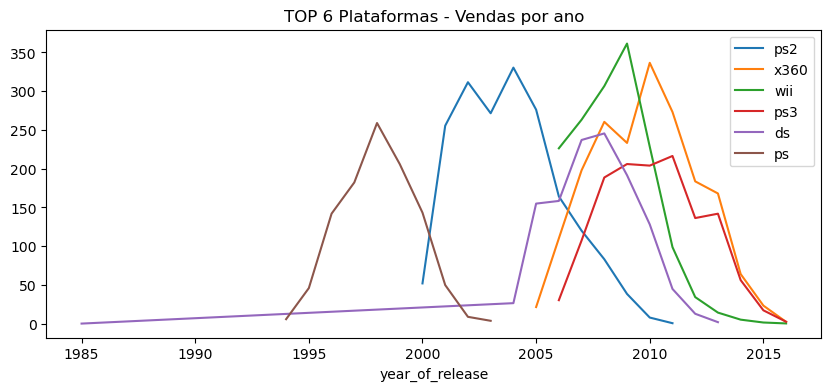

In [20]:
#Construindo um visualização que demostra a performance de vendas de cada unma das principais plataformas ao longo dos anos.

df_princ_plat[df_princ_plat['platform'] == 'ps2'].groupby('year_of_release')['total_sales'].sum().plot(figsize=(10,4))
df_princ_plat[df_princ_plat['platform'] == 'x360'].groupby('year_of_release')['total_sales'].sum().plot(figsize=(10,4))
df_princ_plat[df_princ_plat['platform'] == 'wii'].groupby('year_of_release')['total_sales'].sum().plot(figsize=(10,4))
df_princ_plat[df_princ_plat['platform'] == 'ps3'].groupby('year_of_release')['total_sales'].sum().plot(figsize=(10,4))
df_princ_plat[df_princ_plat['platform'] == 'ds'].groupby('year_of_release')['total_sales'].sum().plot(figsize=(10,4))
df_princ_plat[df_princ_plat['platform'] == 'ps'].groupby('year_of_release')['total_sales'].sum().plot(figsize=(10,4))

plt.title('TOP 6 Plataformas - Vendas por ano')
plt.legend(top_6_names)
plt.show()

**Plataformas que perderam a expressividade ao longo dos anos**

Dentre as principais platformas analisadas, é possível observar que todas sofreram quedas no volume de vendas nos últimos anos. Algumas no entando, possuem um período de vida mais curto. 
Conseguimos destacar como platafromas que tinham um sucesso expressivo no passado e na última década desaparecem, a "ps" e a "ps2".

Vale um destaque também a plataforma DS, a mais antiga entre esse conjunto, pois foi lançada ainda nos anos 1980, mas conseguiu se manter no mercado e aumentar sua expressão de vendas ainda nos anos 2010.

**Análise do cenário atual recente da venda de jogos**

Nesta seção será realizada a análise apenas de um período mais atual da indústria. A definição deste recorte foi realizada a partir do tempo médio de duração das plataformas da base. Este cálculo de as análises realizadas a partir desta definição, poderão ser observadas a seguir.

In [21]:
#Criando  variáveis que armazenam o ano no primeiro e do último lançamento de cada plataforma

first_release = df_games.groupby('platform')['year_of_release'].min() 
last_release = df_games.groupby('platform')['year_of_release'].max()


In [22]:
#Obtendo o tempo de existência de cada plataforma baseada no ano que que fizeram seu primeiro e último lançamento
platform_lifetime = last_release - first_release
platform_lifetime_mean = platform_lifetime.mean()
print(f" O tempo médio de duração de uma plataforma de jogos é de {platform_lifetime_mean} anos.")

 O tempo médio de duração de uma plataforma de jogos é de 7.612903225806452 anos.


In [23]:
'''De modo a avaliar os resultados mais recentes, para que se possa ter mais clareza o sobre os possíveis resultados e ações do 
ano seguinte, foi realizado um recorte temporal dos últimos 4 anos da base de dados, que será utilizado em todas as análises
posteiores.'''

df_recent = df_games[df_games['year_of_release'] >= 2013]

In [24]:
plat_recent_list = df_recent['platform'].unique()

In [25]:
def plot_platform_sales(platform_list, df):
    for plat in platform_list:
        df_recent[df_recent['platform'] == plat].groupby('year_of_release')['total_sales'].sum().plot(figsize=(10,4))
    
    plt.xlabel('Ano de lançamento')
    plt.ylabel('Total de vendas (em milhões)')
    plt.title('Vendas por plataforma (a partir de 2008)')
    plt.legend(plat_recent_list, title="Platform", ncol=2)
    plt.show()


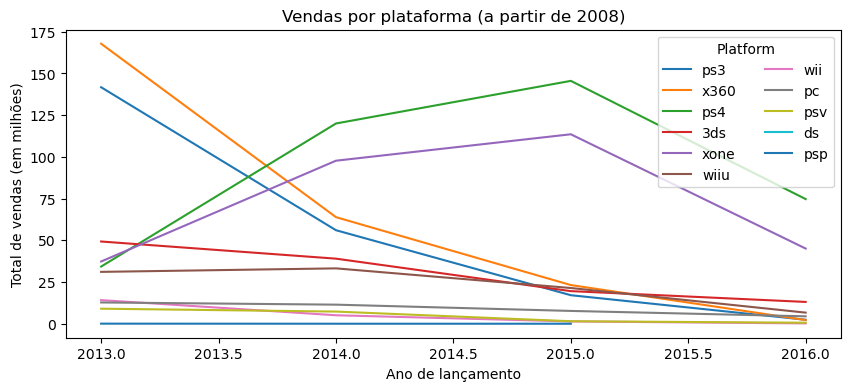

In [26]:
plot_platform_sales(plat_recent_list, df_recent)

In [27]:
# Quais plataformas estão liderando em vendas?
# Quais estão crescendo ou diminuindo? Selecione várias plataformas potencialmente lucrativas.

A maioria das plataformas demostram uma queda no total de vendas. Esta situação é ainda mais alarmante quando se observa a PS3 e X360, que vem de um cenário de vendas muitos altas há poucos anos atras.

Destacam-se com oportunidade crescimento e possível valorização, as plataformas mais recentemente lançadas (ambas em 2013), "PS4" e "XOne".


In [28]:
def plot_platform_boxplots(platforms, df):
    for platform in platforms:
        # Filtrando o dataframe para a plataforma atual
        mask = df_recent['platform'] == platform
        platform_sales = df[mask]['total_sales']
        
        # Plotando o boxplot
       
        #fig, ax = plt.subplots()
        sns.boxplot(x=platform_sales)
        plt.title(f'Boxplot plataforma {platform}')
        plt.xlabel('Total de vendas')
        plt.show()


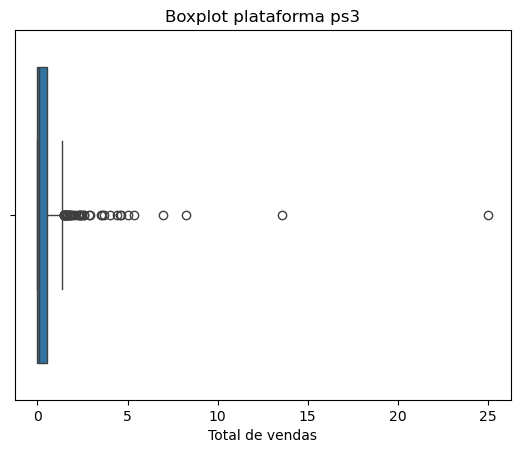

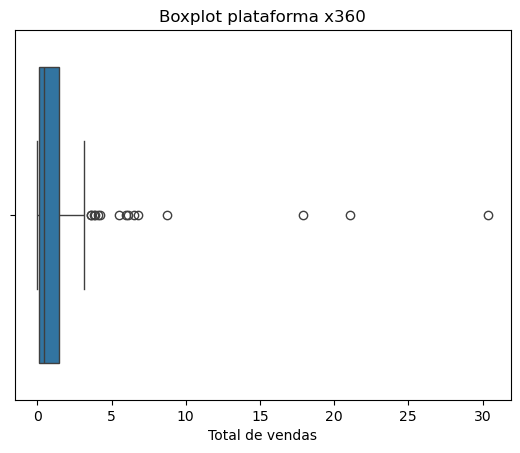

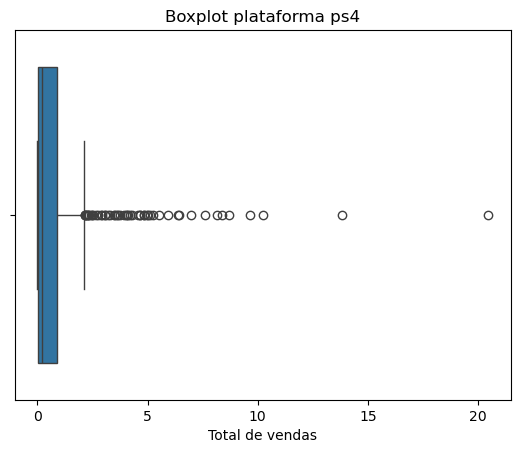

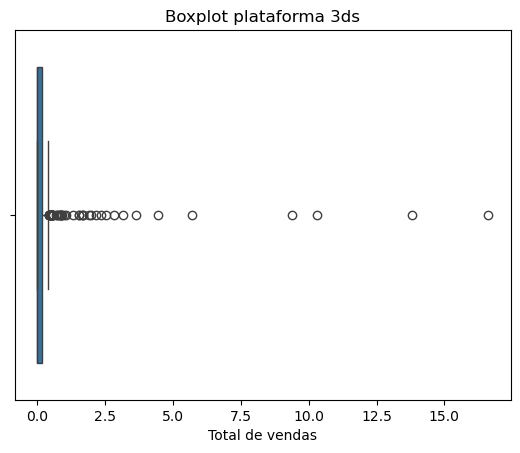

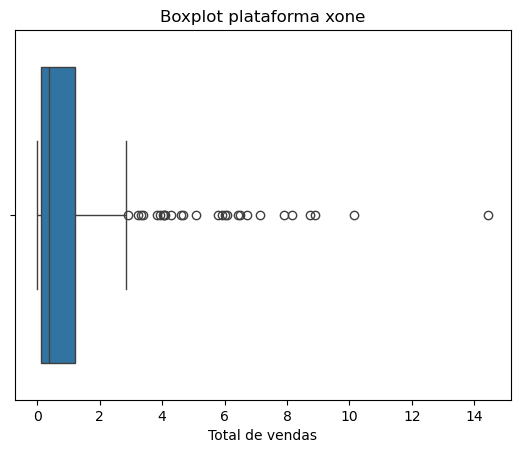

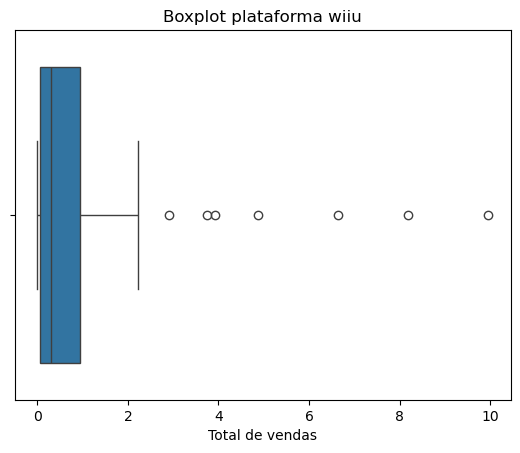

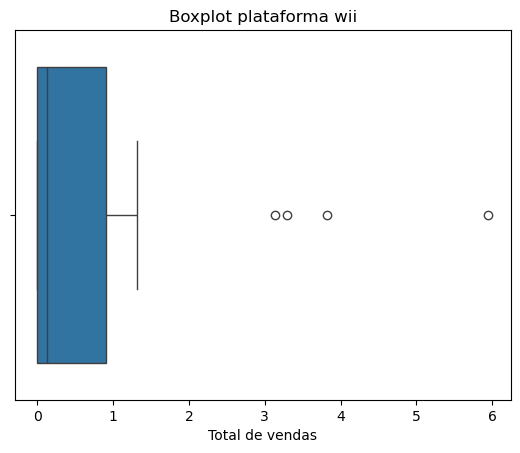

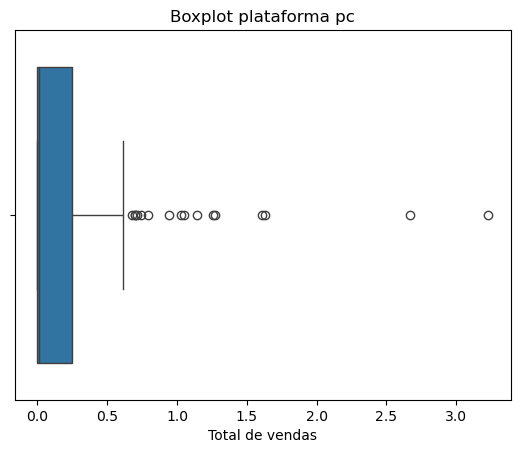

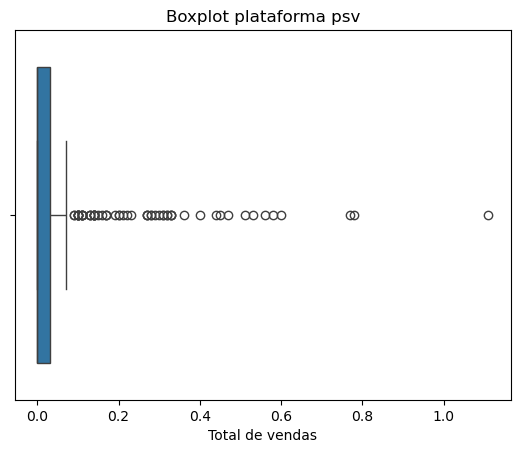

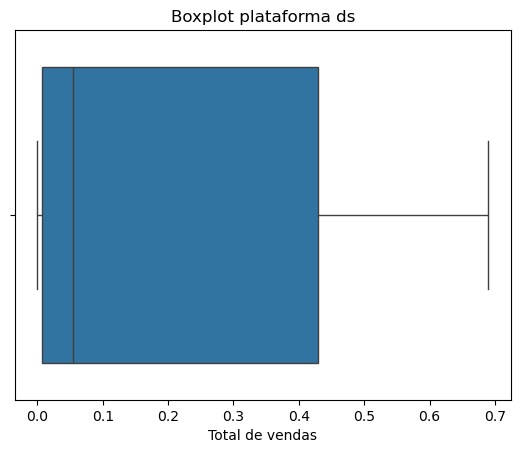

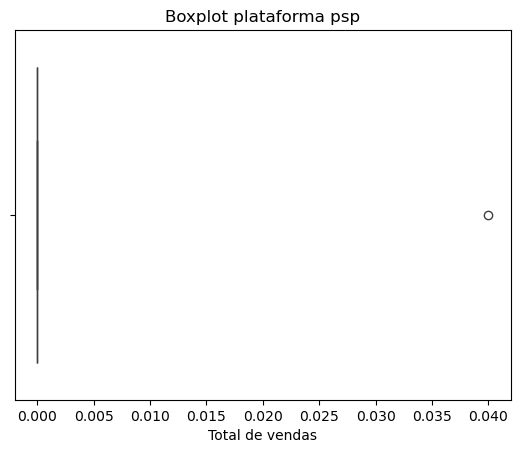

In [29]:
plot_platform_boxplots(plat_recent_list, df_recent)

<div class="alert alert-block alert-info">
<b>Sei que aqui ainda está faltando uma análise, mas ainda estou tentando fazer com que as plotagens apareçam em uma mesma imagem. E achei melhor adiantar o envio para saber se as demais alterações já atenderam ao que foi indicado.</b> <a class="tocSkip"></a>
</div>

**Relação entre avaliações de clientes e vendas**

In [30]:
#Construa um gráfico de dispersão e calcule a correlação entre revisões e vendas
#Plataforma X-One

'''Identificamos a existência de 2.283 valores nulos somandos das colunas "user_score" e "critic_score". 
Como este é um valor expressivo para o total da base, optamos por não deletar essas linhas nas demais análises,
mas para fins da avaliação da dispersão, especificamente, usaremos uma versão do dataframe sem elas.'''



'Identificamos a existência de 2.283 valores nulos somandos das colunas "user_score" e "critic_score". \nComo este é um valor expressivo para o total da base, optamos por não deletar essas linhas nas demais análises,\nmas para fins da avaliação da dispersão, especificamente, usaremos uma versão do dataframe sem elas.'

In [31]:
df_recent[['critic_score', 'user_score']].isna().sum()

critic_score    1242
user_score      1041
dtype: int64

In [32]:
1242+1041

2283

In [33]:
df_clean_score = df_recent.dropna(subset=['user_score', 'critic_score'])



In [34]:
df_clean_score_user = df_clean_score['user_score'].corr(df_clean_score['total_sales'])

print(f" O coeficiente de correlação entre a avaliação dos usuários e o total de vendas  por plataforma é de {df_clean_score_user}")

 O coeficiente de correlação entre a avaliação dos usuários e o total de vendas  por plataforma é de -0.019271206974723117


In [35]:
#Tentativa de filtrar apenas as linhas com uma plataforma

plat_x360_clean = df_clean_score[df_clean_score['platform'] == 'x360']

correlacao_critics= plat_x360_clean['critic_score'].corr(plat_x360_clean['total_sales'])
correlacao_users= plat_x360_clean['user_score'].corr(plat_x360_clean['total_sales'])

print(f" O coeficiente de correlação entre a avaliação dos críticos e o total de vendas da plataforma X360 é de {correlacao_critics}.")
print()
print(f" O coeficiente de correlação entre a avaliação dos usuários e o total de vendas da plataforma X360 é de {correlacao_users}.")

 O coeficiente de correlação entre a avaliação dos críticos e o total de vendas da plataforma X360 é de 0.3432742802542166.

 O coeficiente de correlação entre a avaliação dos usuários e o total de vendas da plataforma X360 é de -0.007939092944318169.


<Axes: title={'center': 'Relação entre a nota dos críticos e a venda de jogos'}, xlabel='Notas dos críticos', ylabel='Total de vendas'>

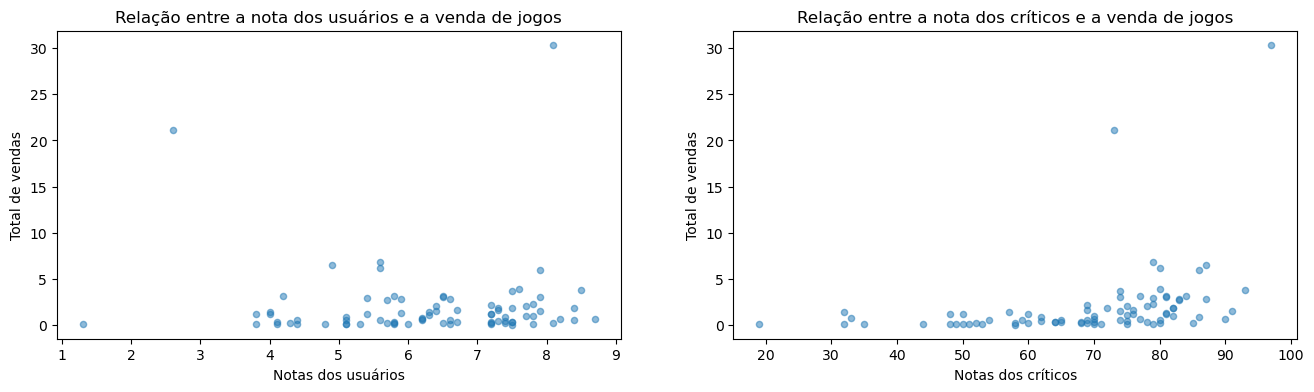

In [36]:
fig, ax = plt.subplots(1, 2, figsize=(16,4))

plat_x360_clean.plot(ax=ax[0],
                    x='user_score', 
                    y='total_sales', 
                    kind='scatter', 
                    alpha=0.5, 
                    xlabel='Notas dos usuários', 
                    ylabel='Total de vendas',
                    title='Relação entre a nota dos usuários e a venda de jogos')
                   

plat_x360_clean.plot(ax=ax[1],
                    x='critic_score', 
                    y='total_sales', 
                    kind='scatter', 
                    alpha=0.5, 
                    xlabel='Notas dos críticos', 
                    ylabel='Total de vendas',
                    title='Relação entre a nota dos críticos e a venda de jogos')
                    

**Análise do gráfico dispersão**

Ambos os gráficos exibem uma visualizaçao similar, em que há uma maior concentração de elementos à direita, onde das notas são maiores. Este comportamento demostra uma correlaçãp positiva entre as notas do usuários e críticos e as vendas de jogos. Em outras palavas, podemos dizer que há comprovação estatística de que os jogos melhor avaliados por usuários e críticas são mais vendidos dos que os possuem uma avaliação mais baixa. 

In [37]:
#Distribuição geral de jogos por gênero
#Indicar gêneros mais lucraticos

#Análise do volume de vendas por cada plataforma

vendas_por_genero = df_recent.groupby('genre')[['genre','total_sales']].sum()
vendas_por_genero = vendas_por_genero.sort_values(by='total_sales', ascending=False) 

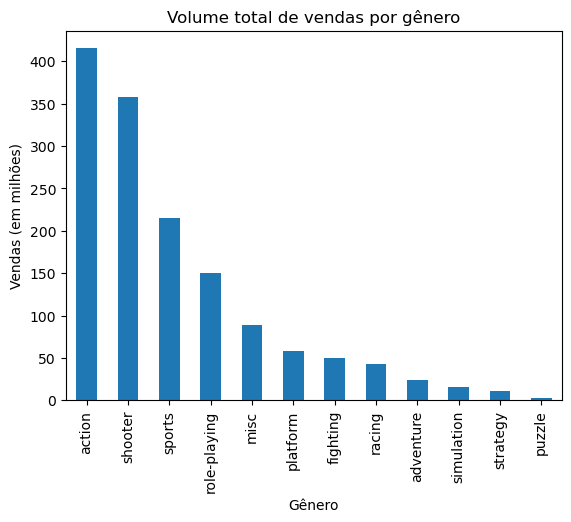

In [38]:
vendas_por_genero['total_sales'].plot(kind='bar', 
                                      title='Volume total de vendas por gênero', 
                                      xlabel='Gênero', 
                                      ylabel='Vendas (em milhões)')
plt.show()

**Distribuição dos valores por gênero dos jogos**

Levando em consideração a premissa anterior que considerou as receitas anuais acima de 1.000 como as principais, poderíamos assumir avaliando o desempenho de vendas por genero que os jogos de ação são os mais lucrativos, pois são os únicos que superam (com uma margem consideravelmente alta) esse valor. No entanto, os jogos de tiro, de esportes e misc, também apresentam grande expressão nas vendas. Juntos, estes concentram a maior parte dos lucros obtidos.

# ETAPA 4 - Perfis de usuários

In [39]:
df_recent.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,grand theft auto v,ps3,2013,action,7.02,9.09,0.98,3.96,97.0,8.2,M,25.02
23,grand theft auto v,x360,2013,action,9.66,5.14,0.06,1.41,97.0,8.1,M,30.39
31,call of duty: black ops 3,ps4,2015,shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,20.47
33,pokemon x/pokemon y,3ds,2013,role-playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,16.62
42,grand theft auto v,ps4,2014,action,3.96,6.31,0.38,1.97,97.0,8.3,M,13.85


In [40]:
#Determinando as principais platafomrmas da América do Norte

df_na_sales = df_recent.groupby('platform')['na_sales'].sum().head()
df_na_sales = df_na_sales.sort_values(ascending=False)

In [41]:
#Determinando as principais platafomrmas da América do Norte

df_eu_sales = df_recent.groupby('platform')['eu_sales'].sum().head()
df_eu_sales = df_eu_sales.sort_values(ascending=False)

In [42]:
#Determinando as principais platafomrmas da América do Norte

df_jp_sales = df_recent.groupby('platform')['jp_sales'].sum().head()
df_jp_sales = df_jp_sales.sort_values(ascending=False)

<Axes: title={'center': 'TOP 5 plataformas do Japão'}, xlabel='Plataformas', ylabel='Total de vendas'>

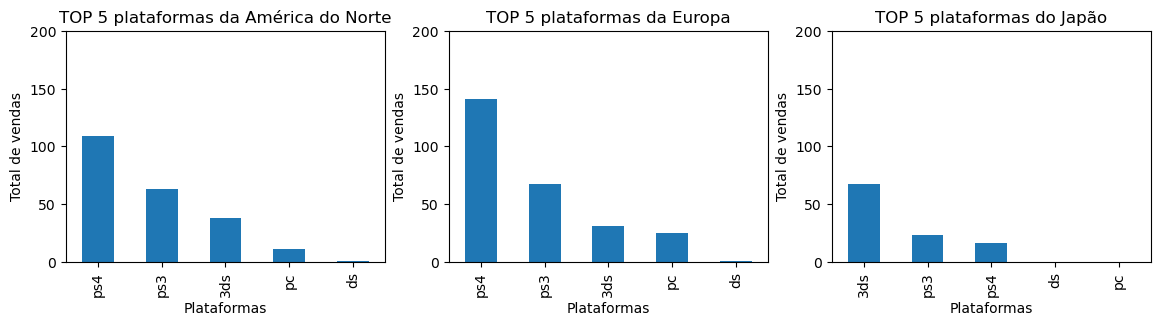

In [43]:
fig, ax = plt.subplots(1,3, figsize=(14,3))

df_na_sales.plot(   ax=ax[0],
                    x='platform',
                    y='total_sales', 
                    kind='bar', 
                    xlabel='Plataformas', 
                    ylabel='Total de vendas',
                    title='TOP 5 plataformas da América do Norte',
                    yticks=[0,50,100,150,200]
                    )

df_eu_sales.plot(   ax=ax[1],
                    x='platform',
                    y='total_sales', 
                    kind='bar', 
                    xlabel='Plataformas', 
                    ylabel='Total de vendas',
                    title='TOP 5 plataformas da Europa',
                    yticks=[0,50,100,150,200]
                )

df_jp_sales.plot(   ax=ax[2],
                    x='platform',
                    y='total_sales', 
                    kind='bar', 
                    xlabel='Plataformas', 
                    ylabel='Total de vendas',
                    title='TOP 5 plataformas do Japão',
                    yticks=[0,50,100,150,200]
                )

**Análise da vendas por região**

Ao analisar o comportamento das vendas por região, constatamos que a América do Norte e a Europa tem um comportamento de vendas muito similar. Sendo o cenário que mais se diferencia o do Japão, que demonstra o menor volume de vendas e uma preferência diferente por plataformas.

No que se refere às plataformas preferidas, a PS4 lidera com folga as vendas da América do Norte e Europa. No Japão, a mesma plataforma aparece apenas na terceira posição entre as mais vendidas. 
A PS3 aparece como segunda mais vendida nas três regiões. A PC, só aparece com algum destaque na América do Norte e Europa, mas não apresenta vendas expressivas no Japão.  



# ETAPA 5 - Teste de hipóteses

In [44]:
#Igualdade da média de avaliação das plataformas Xbox One e PC são as mesmas


'''Para testar a média entre as duas populações deve ser usado o st.ttest. 
Por padrão covencionado pela área estatística, será utilizado 0,05% como índice de significância estatística.

Hipótese Nula  (Ho): As médias de avaliação dos usuários das plataformas XBox One e PC são iguais.

Hipótese Alternativa (H1): As médias de avaliação dos usuários das plataformas XBox One e PC não são iguais.
'''
score_xone = df_clean_score[df_clean_score['platform'] == 'xone']
score_xone = score_xone['user_score'].tolist()

score_pc = df_clean_score[df_clean_score['platform'] == 'pc']
score_pc = score_pc['user_score'].tolist()

alpha = 0.05  # nível crítico de significância estatística


var_xone = np.var(score_xone)
var_pc = np.var(score_pc)

print(f"Variância do Xbox One: {var_xone}")
print(f"Variância do PC: {var_pc}")
print()
print()


results = st.ttest_ind(score_xone, score_pc, equal_var=False)

print('valor-p: ', results.pvalue) # extraindo o valor-p

if results.pvalue < alpha: # comparando o valor-p com o limiar
    print("Rejeitamos a hipótese nula")
else:
    print("Não podemos rejeitar a hipótese nula")

Variância do Xbox One: 1.7855118457300279
Variância do PC: 2.912631026296567


valor-p:  0.17882648263401307
Não podemos rejeitar a hipótese nula


**Análise sobre a igualdade de médias de avaliação das plataformas XBox One e PC**

O resultado obtido pelo p-valor não nos permite afirmar que existe uma diferença significativa entre as médias de avaliação das plataformas XBox One e PC. 


In [45]:
# Teste para verificar se as classificações médias de usuários para os gêneros Action (ação) e Sports (esportes) são diferentes.
'''Para testar a média entre as duas populações deve ser usado o st.ttest. 
Por padrão covencionado pela área estatística, será utilizado 0,05% como índice de significância estatística.

Hipótese Nula: Não há diferença nas classificações médias dos gêneros ação e esportes.

Hipótese Alternativa: Existe diferença nas classificações médias dos gêneros ação e esportes.
'''
score_action = df_clean_score[df_clean_score['genre'] == 'action']
score_action = score_action['user_score'].tolist()

score_sports = df_clean_score[df_clean_score['genre'] == 'sports']
score_sports = score_sports['user_score'].tolist()

alpha = 0.05  # nível crítico de significância estatística

var_action = np.var(score_action)
var_sports = np.var(score_sports)

print(f"Variância action games : {var_action}")
print(f"Variância sport games: {var_sports}")
print()
print()
    
    
results = st.ttest_ind(score_action, score_sports, equal_var = False)

print('valor-p: ', results.pvalue) # extraindo o valor-p

    if results.pvalue < alpha: # comparando o valor-p com o limiar
        print("Rejeitamos a hipótese nula")
    else:
        print("Não podemos rejeitar a hipótese nula")

IndentationError: unexpected indent (3992374161.py, line 30)

**Análise sobre a igualdade de médias de avaliação dos gêneros ação e esportes**

Neste teste, o baixo p-valor resultou na rejeição da hipótese nula, o que indica que a diferença na média  de avaliação entre os jogos dos gêneros ação e esportes é estatisticamente significativa. Portanto, as avaliações médias dos jogos desses dois gêneros são significativamente diferentes.